C:\Users\olbon.DESKTOP-U9M7616\AppData\Local\Temp\ipykernel_26264\3891264283.py:17: DtypeWarning: Columns (34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


✅ Données chargées : 140247 lignes
Colonnes : ['Année', 'Numéro', 'Département', 'code_insee', 'Nom de la commune', 'Date de première alerte', 'Surface parcourue (m2)', 'Surface forêt (m2)', 'Surface maquis garrigues (m2)', 'Type de peuplement', 'Nature', 'Année_calc', 'mois', 'jour', 'jour_semaine', 'mois_jour_code', 'jour_de_l_annee', 'cos_jour', 'sin_jour', 'is_weekend', 'is_public_holiday', 'is_school_vacation', 'est_jour_ouvre', 'surface_ha', 'nom_standard', 'latitude_centre', 'longitude_centre', 'nom_commune_finale', 'periode', 'Surfaces non boisées (m2)', 'Autres surfaces naturelles hors forêt (m2)', 'Surface autres terres boisées (m2)', 'Surfaces non boisées naturelles (m2)', 'Surfaces non boisées artificialisées (m2)', 'Précision de la donnée', 'Précision des surfaces', 'Décès ou bâtiments touchés', 'Surfaces agricoles (m2)', 'Autres surfaces (m2)', 'Nombre de décès', 'Nombre de bâtiments totalement détruits', 'Nombre de bâtiments partiellement détruits']


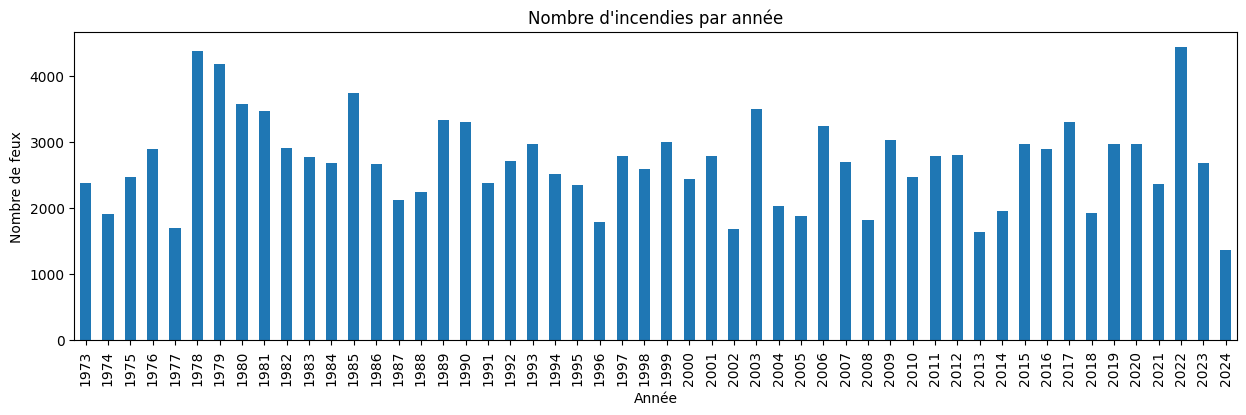

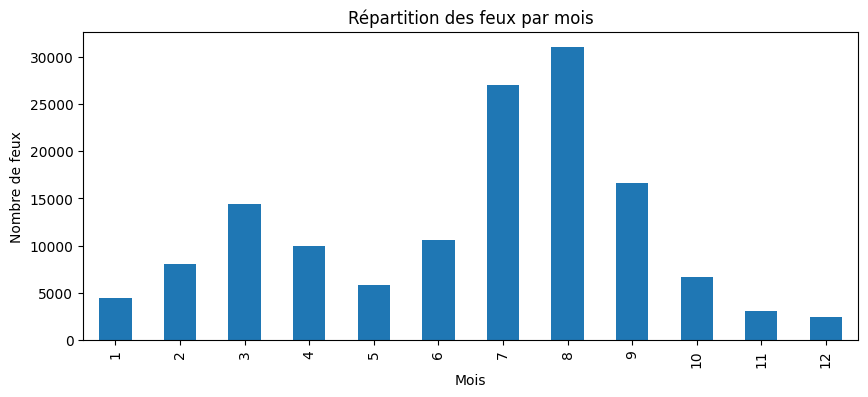

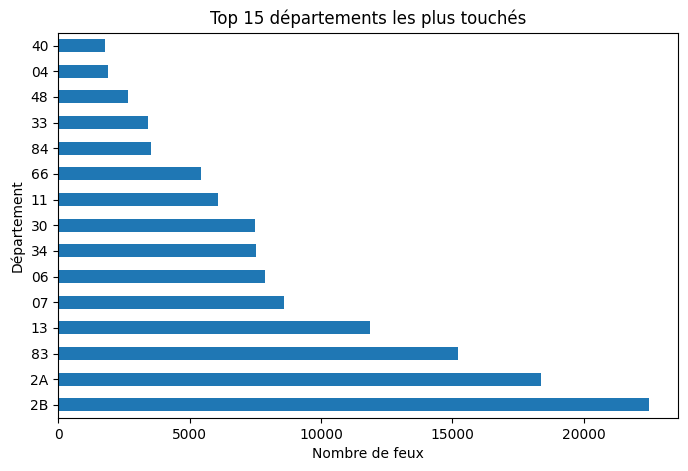

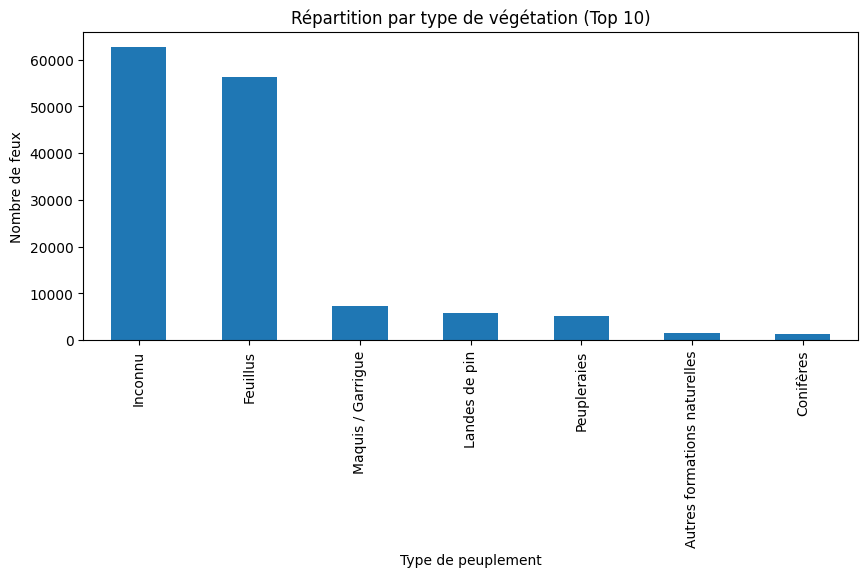

Type de peuplement libellé
Inconnu                         62732
Feuillus                        56332
Maquis / Garrigue                7218
Landes de pin                    5778
Peupleraies                      5218
Autres formations naturelles     1621
Conifères                        1348
Name: count, dtype: int64


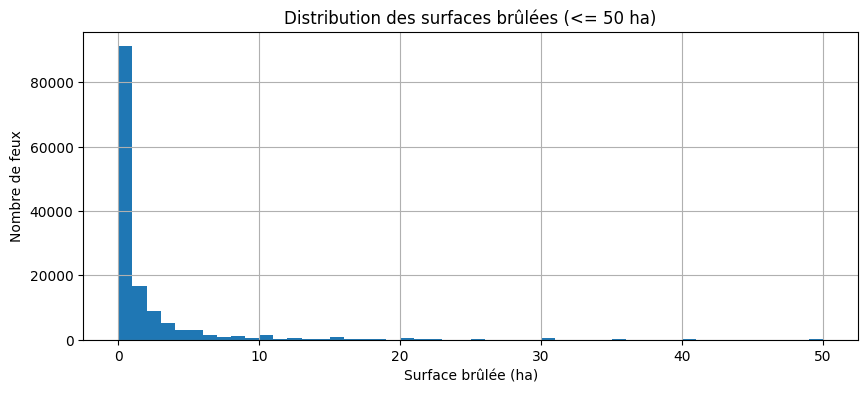

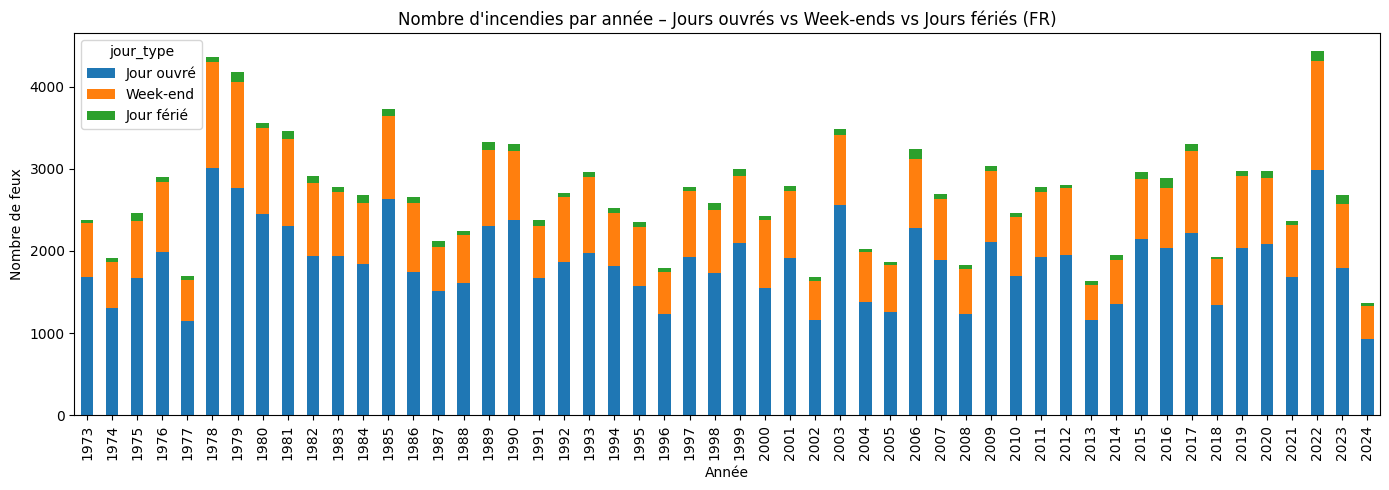

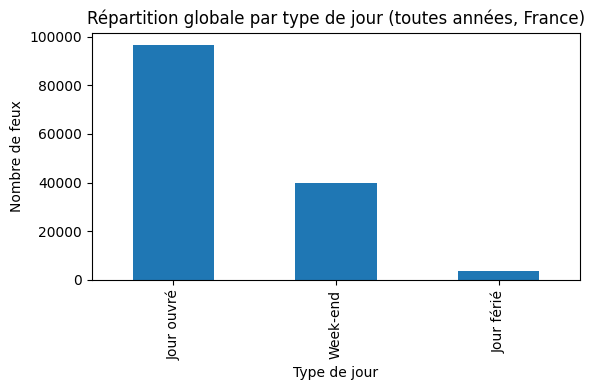

Pourcentages globaux (%):
jour_type
Jour ouvré    69.0
Week-end      28.5
Jour férié     2.5
Name: count, dtype: float64


c:\Users\olbon.DESKTOP-U9M7616\OneDrive\Bureau\Olivier\La Plate-forme\Work\terre-vent-feu-eau-data\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\olbon.DESKTOP-U9M7616\OneDrive\Bureau\Olivier\La Plate-forme\Work\terre-vent-feu-eau-data\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Clusters HDBSCAN trouvés (hors bruit) : 1434


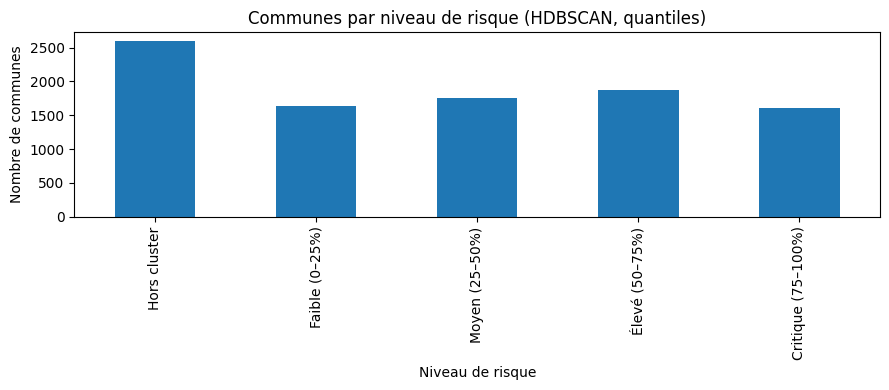

Carte enregistrée → data\processed\carte_hdbscan_risque.html


WindowsPath('data/processed/carte_hdbscan_risque.html')

In [ ]:
# === Cellule 1 : Imports et chargement ===
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Cherche le fichier consolidé
candidates = [
    Path("data/processed/bdiff_1973_2024.csv"),
    Path("../data/processed/bdiff_1973_2024.csv"),
    Path("../../data/processed/bdiff_1973_2024.csv"),
]
csv_path = next((p for p in candidates if p.exists()), None)

if csv_path is None:
    raise FileNotFoundError("⚠️ Fichier non trouvé. Lance d'abord l’ETL pour générer bdiff_1973_2024.csv")

df = pd.read_csv(csv_path)

print("✅ Données chargées :", len(df), "lignes")
print("Colonnes :", df.columns.tolist())
df.head()
# === Cellule 2 : Nombre de feux par année ===
col_annee = "Année_calc" if "Année_calc" in df.columns else "Année"
df[col_annee].value_counts().sort_index().plot(kind="bar", figsize=(15,4))
plt.title("Nombre d'incendies par année")
plt.xlabel("Année")
plt.ylabel("Nombre de feux")
plt.show()
# === Cellule 3 : Répartition par mois ===
if "mois" in df.columns:
    df["mois"].value_counts().sort_index().plot(kind="bar", figsize=(10,4))
    plt.title("Répartition des feux par mois")
    plt.xlabel("Mois")
    plt.ylabel("Nombre de feux")
    plt.show()
else:
    print("⚠️ Colonne 'mois' manquante (à ajouter dans ETL).")
# === Cellule 4 : Top 15 départements ===
if "Département" in df.columns:
    top_deps = df["Département"].value_counts().head(15)
    top_deps.plot(kind="barh", figsize=(8,5))
    plt.title("Top 15 départements les plus touchés")
    plt.xlabel("Nombre de feux")
    plt.ylabel("Département")
    plt.show()
else:
    print("⚠️ Colonne 'Département' absente.")

# === Cellule 5 : Répartition par type de végétation ===
# === Cellule 5 : Répartition par type de végétation (avec libellés explicites) ===

# Dictionnaire de correspondance BDIFF
veg_map = {
    1.0: "Feuillus",
    2.0: "Conifères",
    3.0: "Peupleraies",
    4.0: "Maquis / Garrigue",
    5.0: "Landes de pin",
    6.0: "Autres formations naturelles",
    7.0: "Culture / Zone agricole",
    8.0: "Zone urbaine / Autre"
}

if "Type de peuplement" in df.columns:
    # Remplacer les codes par des libellés
    df["Type de peuplement libellé"] = df["Type de peuplement"].map(veg_map).fillna("Inconnu")

    # Top 10
    top_veg = df["Type de peuplement libellé"].value_counts().head(10)
    top_veg.plot(kind="bar", figsize=(10,4))

    plt.title("Répartition par type de végétation (Top 10)")
    plt.xlabel("Type de peuplement")
    plt.ylabel("Nombre de feux")
    plt.show()

    print(top_veg)
else:
    print("⚠️ Colonne 'Type de peuplement' absente.")

# === Cellule 6 : Distribution des surfaces brûlées ===
if "surface_ha" in df.columns:
    df["surface_ha"].hist(bins=50, range=(0,50), figsize=(10,4))
    plt.title("Distribution des surfaces brûlées (<= 50 ha)")
    plt.xlabel("Surface brûlée (ha)")
    plt.ylabel("Nombre de feux")
    plt.show()
else:
    print("⚠️ Colonne 'surface_ha' absente.")

# === Cellule 7 : Comparaison Jours ouvrés / Week-ends / Jours fériés (France) ===
import sys, subprocess
import pandas as pd
import matplotlib.pyplot as plt

# 0) Installer holidays si absent
try:
    import holidays
except ImportError:
    print("📦 Installation du paquet 'holidays'...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "holidays"])
    import holidays

# 1) Trouver une colonne de date
date_candidates = [
    "Date de première alerte","date_alerte","date","datetime_alerte",
    "DateAlerte","date_debut","date_debut_alerte"
]
date_col = next((c for c in date_candidates if c in df.columns), None)
if not date_col:
    raise ValueError("Colonne date introuvable. Ajoute le bon nom dans date_candidates.")

d = pd.to_datetime(df[date_col], errors="coerce")
if d.isna().all():
    raise ValueError(f"Impossible de parser les dates dans {date_col}.")

# 2) Week-end ?
is_weekend = d.dt.weekday >= 5  # 5=Sam, 6=Dim

# 3) Jours fériés France sur toute la période du dataset
annees_presentes = d.dt.year.dropna().astype(int).unique()
fr_holidays = holidays.country_holidays("FR", years=sorted(annees_presentes))
is_holiday = d.dt.date.map(lambda x: x in fr_holidays if pd.notna(x) else False)

# 4) Catégorie du jour (priorité férié sur week-end : décommente la préférence souhaitée)

# a) Prioriser le férié (si férié tombe un dimanche → "Jour férié")
jour_type = pd.Series("Jour ouvré", index=df.index)
jour_type[is_weekend] = "Week-end"
jour_type[is_holiday] = "Jour férié"

# b) (Alternative) Prioriser le week-end (si tu préfères):
# jour_type = pd.Series("Jour ouvré", index=df.index)
# jour_type[is_holiday] = "Jour férié"
# jour_type[is_weekend] = "Week-end"

# 5) Année robuste
annee_col = "Année_calc" if "Année_calc" in df.columns else ("Année" if "Année" in df.columns else None)
annee = d.dt.year if annee_col is None else df[annee_col]

tmp = pd.DataFrame({"annee": annee, "jour_type": jour_type}).dropna(subset=["annee"])
tmp["annee"] = tmp["annee"].astype(int)

# 6) Comptage par année et type (robuste si une catégorie manque)
counts = tmp.groupby(["annee", "jour_type"]).size().unstack(fill_value=0)
for col in ["Jour ouvré", "Week-end", "Jour férié"]:
    if col not in counts.columns:
        counts[col] = 0
counts = counts[["Jour ouvré","Week-end","Jour férié"]]

# 7) Graphique empilé (par année)
plt.figure(figsize=(14,5))
counts.plot(kind="bar", stacked=True, ax=plt.gca())
plt.title("Nombre d'incendies par année – Jours ouvrés vs Week-ends vs Jours fériés (FR)")
plt.xlabel("Année"); plt.ylabel("Nombre de feux")
plt.tight_layout(); plt.show()

# 8) Répartition globale + pourcentages
global_counts = tmp["jour_type"].value_counts()
for k in ["Jour ouvré","Week-end","Jour férié"]:
    if k not in global_counts.index:
        global_counts.loc[k] = 0
global_counts = global_counts[["Jour ouvré","Week-end","Jour férié"]]

plt.figure(figsize=(6,4))
global_counts.plot(kind="bar")
plt.title("Répartition globale par type de jour (toutes années, France)")
plt.xlabel("Type de jour"); plt.ylabel("Nombre de feux")
plt.tight_layout(); plt.show()

print("Pourcentages globaux (%):")
print((global_counts / global_counts.sum() * 100).round(1))

# === CLUSTERING HDBSCAN + RISQUE PAR COMMUNE ===
import hdbscan
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import BallTree
import numpy as np

# Vérifier colonnes nécessaires
needed = {"latitude_centre","longitude_centre","code_insee"}
missing = needed - set(df.columns)
if missing:
    raise ValueError(f"Colonnes manquantes : {missing}. Assure-toi d'avoir fait la jointure communes.")

# 1) Préparer les données feux
feux = df.dropna(subset=["latitude_centre","longitude_centre"]).copy()
if feux.empty:
    raise ValueError("Aucun feu avec coordonnées disponibles.")

# Paramètres HDBSCAN
MIN_CLUSTER_SIZE = 30   # nb min de feux par cluster (ajuste si besoin)
MIN_SAMPLES = 10        # min_samples influence la robustesse aux points isolés

X = feux[["latitude_centre","longitude_centre"]].values

# HDBSCAN (metric haversine → coordonnées en radians)
X_rad = np.radians(X)
hdb = hdbscan.HDBSCAN(min_cluster_size=MIN_CLUSTER_SIZE,
                      min_samples=MIN_SAMPLES,
                      metric="haversine")
feux["cluster"] = hdb.fit_predict(X_rad)  # -1 = bruit

n_clusters = len(set(feux["cluster"])) - (1 if -1 in feux["cluster"].unique() else 0)
print(f"Clusters HDBSCAN trouvés (hors bruit) : {n_clusters}")

# --- Risque par cluster (quantiles pour homogénéiser) ---
cluster_counts = feux[feux["cluster"] >= 0].groupby("cluster").size().reset_index(name="nb_feux")

if cluster_counts.empty:
    print("⚠️ Aucun cluster formé. Essaie de réduire MIN_CLUSTER_SIZE.")
else:
    centers = feux[feux["cluster"] >= 0].groupby("cluster")[["latitude_centre","longitude_centre"]].median().reset_index()

    try:
        cluster_counts["bin_q"] = pd.qcut(cluster_counts["nb_feux"], q=4,
                                          labels=["0–25%", "25–50%", "50–75%", "75–100%"])
    except ValueError:
        cluster_counts["rank"] = cluster_counts["nb_feux"].rank(method="average", pct=True)
        cluster_counts["bin_q"] = pd.cut(cluster_counts["rank"], bins=[0,0.25,0.5,0.75,1.0],
                                         labels=["0–25%","25–50%","50–75%","75–100%"], include_lowest=True)

    label_map = {
        "0–25%": "Faible (0–25%)",
        "25–50%": "Moyen (25–50%)",
        "50–75%": "Élevé (50–75%)",
        "75–100%": "Critique (75–100%)"
    }
    cluster_counts["niveau_risque"] = cluster_counts["bin_q"].astype(str).map(label_map)
    cluster_counts["risque_%"] = cluster_counts["bin_q"].cat.codes.astype(float) * 25 + 12.5

    centers = centers.merge(cluster_counts[["cluster","nb_feux","risque_%","niveau_risque"]], on="cluster", how="left")

    # Affectation des communes
    if "communes_small" in globals():
        communes_univ = communes_small[["code_insee","latitude_centre","longitude_centre"]].dropna().drop_duplicates().copy()
        name_col = None
        for c in ["nom_commune_finale","nom_commune","nom","libelle"]:
            if c in communes_small.columns:
                name_col = c; break
        if name_col:
            communes_univ[name_col] = (
                communes_small.groupby("code_insee")[name_col]
                .first()
                .reindex(communes_univ["code_insee"])
                .values
            )
    else:
        communes_univ = feux[["code_insee","latitude_centre","longitude_centre"]].dropna().drop_duplicates().copy()
        name_col = None

    feu_comm = feux[feux["cluster"] >= 0].groupby(["code_insee","cluster"]).size().reset_index(name="n")
    idx = feu_comm.groupby("code_insee")["n"].idxmax()
    major = feu_comm.loc[idx, ["code_insee","cluster"]]
    communes_univ = communes_univ.merge(major, on="code_insee", how="left")
    communes_univ.rename(columns={"cluster":"cluster_majoritaire"}, inplace=True)

    ASSIGN_KM = 30
    if not centers.empty:
        centers_rad = np.radians(centers[["latitude_centre","longitude_centre"]].values)
        tree = BallTree(centers_rad, metric="haversine")

        comm_rad = np.radians(communes_univ[["latitude_centre","longitude_centre"]].values)
        dist_rad, idx_nn = tree.query(comm_rad, k=1)
        dist_km = dist_rad[:,0] * 6371.0

        communes_univ["cluster_proche_id"] = centers.loc[idx_nn[:,0], "cluster"].values
        communes_univ["dist_proche_km"] = dist_km
        communes_univ["cluster_assign"] = np.where(
            communes_univ["cluster_majoritaire"].notna(),
            communes_univ["cluster_majoritaire"],
            np.where(communes_univ["dist_proche_km"] <= ASSIGN_KM, communes_univ["cluster_proche_id"], -1)
        )
    else:
        communes_univ["cluster_proche_id"] = -1
        communes_univ["dist_proche_km"] = pd.NA
        communes_univ["cluster_assign"] = communes_univ["cluster_majoritaire"].fillna(-1)

    communes_risque = communes_univ.merge(
        cluster_counts.rename(columns={"cluster":"cluster_assign"}),
        on="cluster_assign",
        how="left"
    )

    communes_risque["niveau_risque"] = communes_risque["niveau_risque"].fillna("Hors cluster")
    communes_risque["risque_%"] = communes_risque["risque_%"].fillna(0.0)

    communes_risque["source_assign"] = np.where(
        communes_univ["cluster_majoritaire"].notna(), "feux_commune",
        np.where(communes_univ["dist_proche_km"] <= ASSIGN_KM, "nearest_cluster", "none")
    )

    # Graphe final
    plt.figure(figsize=(9,4))
    communes_risque["niveau_risque"].value_counts().reindex(
        ["Hors cluster","Faible (0–25%)","Moyen (25–50%)","Élevé (50–75%)","Critique (75–100%)"]
    ).fillna(0).plot(kind="bar")
    plt.title("Communes par niveau de risque (HDBSCAN, quantiles)")
    plt.xlabel("Niveau de risque"); plt.ylabel("Nombre de communes")
    plt.tight_layout(); plt.show()

# === Carte Folium des clusters HDBSCAN & communes par niveau de risque ===
import sys, subprocess
try:
    import folium
    from folium.plugins import MarkerCluster
except ImportError:
    print("📦 Installation de folium...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "folium"])
    import folium
    from folium.plugins import MarkerCluster

# Sécurité : vérifier que les DataFrames existent
if 'centers' not in locals() or 'communes_risque' not in locals():
    raise RuntimeError("Variables 'centers' et/ou 'communes_risque' introuvables. Exécute d'abord le bloc HDBSCAN.")

# Palette par niveau de risque
COLOR = {
    "Hors cluster": "#9e9e9e",
    "Faible (0–25%)": "#4caf50",
    "Moyen (25–50%)": "#ffb300",
    "Élevé (50–75%)": "#fb8c00",
    "Critique (75–100%)": "#e53935",
}

# Carte centrée France métropolitaine
m = folium.Map(location=[46.6, 2.5], zoom_start=6, tiles="CartoDB positron")

# ---- 1) Centres de clusters (bulles) ----
if not centers.empty:
    fg_centers = folium.FeatureGroup(name="Centres de clusters (HDBSCAN)", show=True)
    for _, r in centers.iterrows():
        lat, lon = float(r["latitude_centre"]), float(r["longitude_centre"])
        nb = int(r.get("nb_feux", 1))
        risk = r.get("niveau_risque", "Hors cluster")
        color = COLOR.get(risk, "#1976d2")

        # Rayon proportionnel (borné)
        radius = max(6, min(30, nb**0.5 * 2))

        popup = folium.Popup(
            f"<b>Cluster #{int(r['cluster'])}</b><br>"
            f"Nb feux: {nb}<br>"
            f"Niveau: {risk}<br>",
            max_width=250
        )
        folium.CircleMarker(
            location=[lat, lon],
            radius=radius,
            popup=popup,
            color=color,
            fill=True,
            fill_opacity=0.7,
            opacity=0.7
        ).add_to(fg_centers)
    fg_centers.add_to(m)

# ---- 2) Communes colorées par niveau de risque ----
# (pratique pour voir la diffusion locale ; activé par défaut)
comm_ok = communes_risque.dropna(subset=["latitude_centre","longitude_centre"]).copy()
fg_communes = folium.FeatureGroup(name="Communes (niveau de risque)", show=True)
mc = MarkerCluster(name="Communes (clusterisé visuel)").add_to(fg_communes)

for _, r in comm_ok.iterrows():
    lat, lon = float(r["latitude_centre"]), float(r["longitude_centre"])
    risk = r.get("niveau_risque", "Hors cluster")
    color = COLOR.get(risk, "#607d8b")
    name = None
    for c in ["nom_commune_finale","nom_commune","nom","libelle"]:
        if c in r and pd.notna(r[c]):
            name = str(r[c]); break
    name = name or str(r["code_insee"])
    nb = r.get("nb_feux", float("nan"))
    dist = r.get("dist_proche_km", float("nan"))
    src = r.get("source_assign", "")

    html = (
        f"<b>{name}</b> (INSEE: {r['code_insee']})<br>"
        f"Niveau: {risk}<br>"
        f"Feux cluster: {'' if pd.isna(nb) else int(nb)}<br>"
        f"Assignation: {src}"
        + ("" if pd.isna(dist) else f"<br>Dist. centre proche: {dist:.1f} km")
    )
    folium.CircleMarker(
        location=[lat, lon],
        radius=3.5,
        color=color,
        fill=True,
        fill_opacity=0.6,
        opacity=0.6,
        popup=folium.Popup(html, max_width=280)
    ).add_to(mc)

fg_communes.add_to(m)

# ---- 3) Légende simple ----
legend_html = """
<div style="
     position: fixed; bottom: 20px; left: 20px; z-index:9999;
     background: white; padding: 10px 12px; border:1px solid #bbb; border-radius: 6px;
     box-shadow: 0 1px 4px rgba(0,0,0,0.2); font-size: 13px;">
<b>Niveaux de risque</b><br>
<span style="display:inline-block;width:10px;height:10px;background:#9e9e9e;margin-right:6px;"></span>Hors cluster<br>
<span style="display:inline-block;width:10px;height:10px;background:#4caf50;margin-right:6px;"></span>Faible (0–25%)<br>
<span style="display:inline-block;width:10px;height:10px;background:#ffb300;margin-right:6px;"></span>Moyen (25–50%)<br>
<span style="display:inline-block;width:10px;height:10px;background:#fb8c00;margin-right:6px;"></span>Élevé (50–75%)<br>
<span style="display:inline-block;width:10px;height:10px;background:#e53935;margin-right:6px;"></span>Critique (75–100%)<br>
</div>
"""
m.get_root().html.add_child(folium.Element(legend_html))

# ---- 4) Contrôle des calques + export ----
folium.LayerControl(collapsed=False).add_to(m)

out_candidates = [
    Path("data/processed/carte_hdbscan_risque.html"),
    Path("../data/processed/carte_hdbscan_risque.html"),
]
out_html = None
for p in out_candidates:
    try:
        p.parent.mkdir(parents=True, exist_ok=True)
        m.save(str(p))
        out_html = p
        break
    except Exception:
        continue

print("Carte enregistrée →", out_html)
out_html
